## Correlation $\langle z_i F_J \rangle$

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [2]:
ls=[16,24,32,64,128,256]
h_max=5.44
zf={}
f={}
z={}
for l in ls:
    data=np.load(f'data/input_output_map/input_output_2nn_{l}_l_{h_max}_h_100_n.npz')
    zf[l]=data['correlation']
    f[l]=data['density_F']
    z[l]=data['density']

#### Study the Quantum Covariance

In [3]:

g={}
for l in ls:

    cov=zf[l]-f[l][:,None,:]*z[l][:,:,None]

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    
g_cl={}
for l in ls:
    
    df=f[l]-np.average(f[l],axis=0)[None,:]
    dz=z[l]-np.average(z[l],axis=0)[None,:]
    
    cov=np.average(df[:,None,:]*dz[:,:,None],axis=0)/(np.std(f[l],axis=0)[None,:,None]*np.std(z[l],axis=0)[None,None,:])

    idx=np.arange(l)
    c=np.zeros((f[l].shape[0],l,l))
    for i in range(l+1):
        c[:,i%l,:]=cov[:,idx,(idx+i)%l]

    g_cl[l]=np.average(c,axis=-1)
    #g[l]=np.average(g[l],axis=0)
    

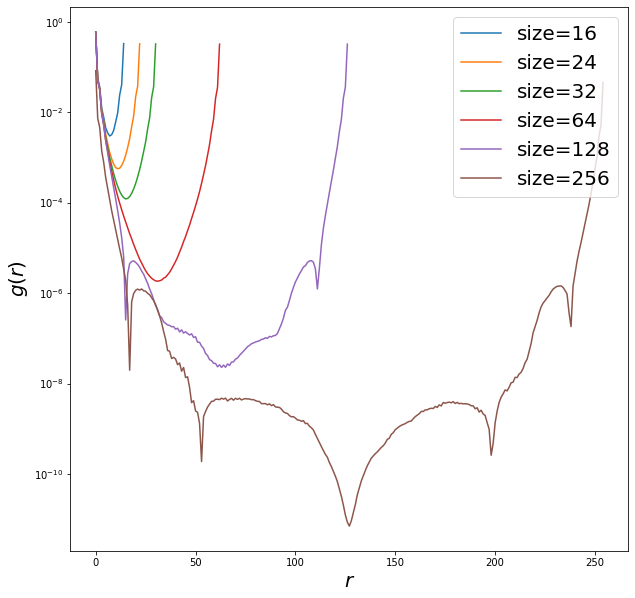

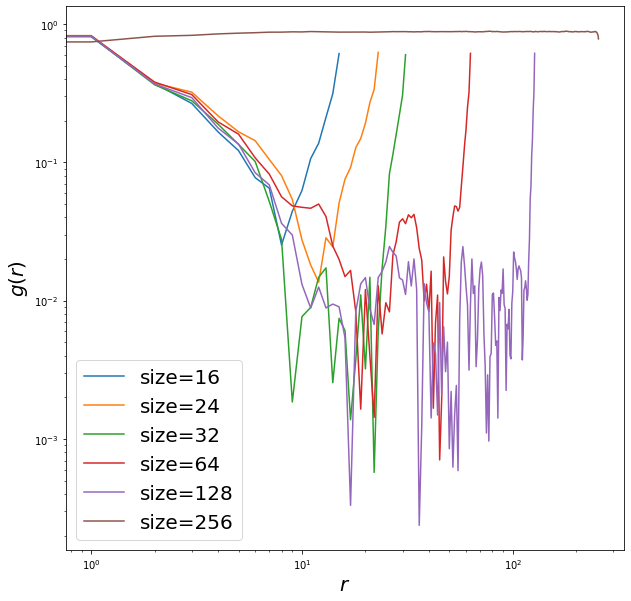

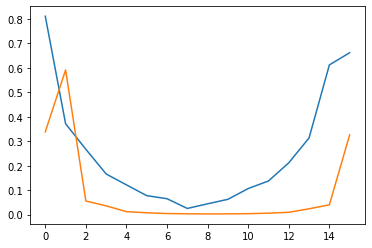

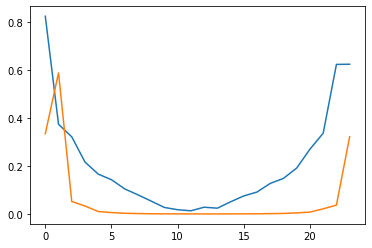

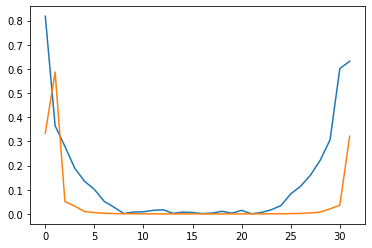

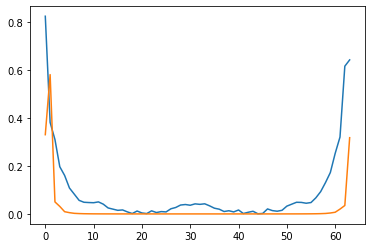

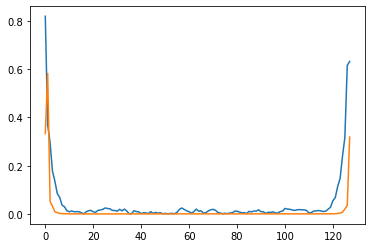

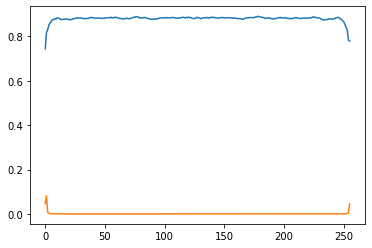

In [4]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1)[1:],label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.semilogy()
plt.show()

plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=1),label=f'size={l}')
    
plt.ylabel(r'$g(r)$',fontsize=20)
plt.xlabel(r'$r$',fontsize=20)
plt.legend(fontsize=20)
plt.loglog()
plt.show()

for l in ls:
    plt.plot(np.roll(np.abs(np.average(g_cl[l],axis=0)),shift=0),label=f'size={l} cl')
    plt.plot(np.roll(np.abs(np.average(g[l],axis=0)),shift=1),label=f'size={l} quantum')
    plt.show()


## Classical ZXX correlation

## 1nn Ising Case

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

#### Data

In [22]:
ls=[256]
zs={}
fs={}
cov={}
g={}


for l in ls:
    data=np.load(f'data/dataset_1nn/081222/test_unet_periodic_{l}_l_1.0_h_15000_n.npz')
    z=data['density']
    f=data['density_F']

            
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    print('done df')
    av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
    print('done av_zf')
    std_av=(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    print('done std_av')
    av_z_av_f=(np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:])
    av_zf=av_zf-av_z_av_f
    cov=av_zf/std_av
    
    c=np.zeros((l,l))

    
    for s in range(l):
        for j in range(l):
            c[s,j]=cov[s,(s+j) %l]
            
    g[l]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

done df
done av_zf
done std_av


#### Plots

/tmp/ipykernel_495773/979153829.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(15*(np.arange(128))**(-3.),label='fit',linestyle='--',color='red')


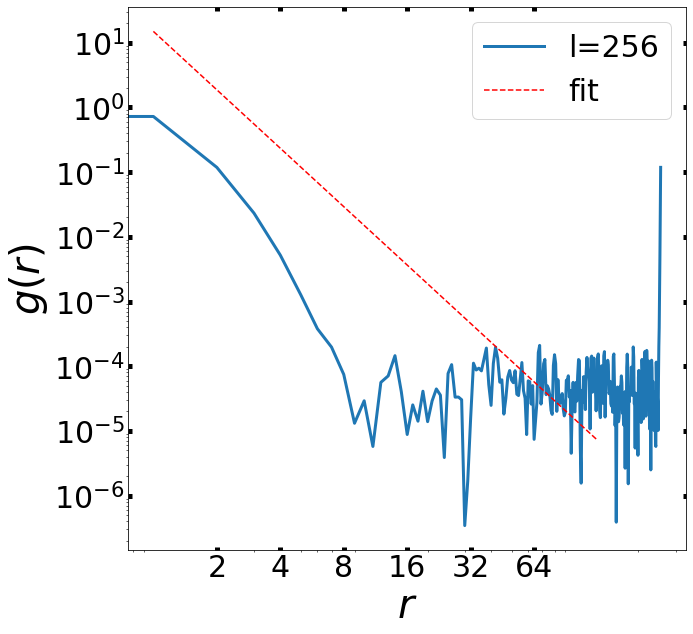

In [23]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(g[l],shift=1),label=f'l={l}',linewidth=3,)

plt.plot(15*(np.arange(128))**(-3.),label='fit',linestyle='--',color='red')

plt.loglog()
#plt.semilogy()
plt.legend(fontsize=30)
plt.xlabel(r'$r$',fontsize=40)
plt.ylabel(r'$g(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
plt.tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
plt.show()

## 2nn Ising Case

#### Imports

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import trange

#### Data

In [18]:
ls=[256]
zs={}
fs={}
cov={}
g={}


for l in ls:
    data=np.load(f'data/dataset_2nn/final_test/test_pbc_{l}_l_5.6_h_15000_n.npz')

    z=data['density'][:300]
    f=data['density_F'][:300]
    
    print(z[-1])


            
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    print('done df')
    av_zf=np.einsum('ai,aj->ij',dz,df)/f.shape[0]
    print('done av_zf')
    std_av=(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    print('done std_av')
    av_z_av_f=(np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:])
    av_zf=av_zf-av_z_av_f
    cov=av_zf/std_av
    
    c=np.zeros((l,l))

    
    for s in range(l):
        for j in range(l):
            c[s,j]=cov[s,(s+j) %l]
            
    g[l]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

[-9.23560647e-01 -8.99363176e-01 -8.48873604e-01 -7.83982149e-01
 -6.36645149e-01 -8.89296970e-01 -8.47070711e-01 -3.88097051e-01
 -4.09814815e-01 -5.48215899e-01 -8.22407858e-01 -7.14668003e-01
 -3.69073596e-03 -8.59242525e-01 -1.95717014e-02 -8.24187901e-01
 -6.86638502e-01 -7.54256370e-01 -7.83832386e-01 -5.35357586e-01
 -3.04862276e-01 -8.88720952e-01 -8.95868017e-01 -9.10223619e-01
 -6.55781845e-01 -6.84552728e-01 -6.89853156e-01 -4.87940470e-01
 -5.14130328e-02 -6.32128419e-01 -1.48584973e-01 -1.48120843e-01
 -7.51804837e-01 -6.57542463e-01 -5.93719463e-01 -8.63946299e-01
 -8.53120093e-01 -6.41422997e-01 -8.42537829e-01 -8.31850276e-01
 -9.36301686e-01 -9.22763851e-01 -9.46629228e-01 -9.48329153e-01
 -9.48532492e-01 -9.41313410e-01 -9.18499793e-01 -5.07614896e-01
 -4.85447406e-01 -7.22842721e-01 -5.86538122e-01 -6.12379138e-01
 -8.35353147e-01 -8.92608809e-01 -8.68807826e-01 -4.71589149e-01
 -2.34803954e-02 -7.72010737e-01 -5.48888129e-01 -8.81401716e-01
 -8.67215464e-01 -3.56834

#### Plots

/tmp/ipykernel_495773/979153829.py:5: RuntimeWarning: divide by zero encountered in power
  plt.plot(15*(np.arange(128))**(-3.),label='fit',linestyle='--',color='red')


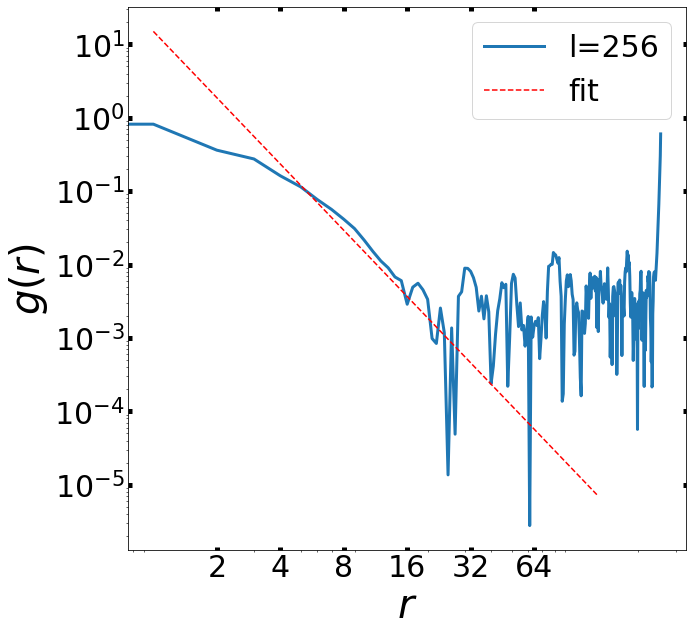

In [19]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(g[l],shift=1),label=f'l={l}',linewidth=3,)

plt.plot(15*(np.arange(128))**(-3.),label='fit',linestyle='--',color='red')

plt.loglog()
#plt.semilogy()
plt.legend(fontsize=30)
plt.xlabel(r'$r$',fontsize=40)
plt.ylabel(r'$g(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
plt.tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
plt.show()

## Long range

#### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### Data

In [44]:
ls=[16,17,18,19,20]
zs={}
fs={}
cov={}
g={}
for l in ls:
    data=np.load(f'data/dataset_long_range/unet_long_range_pbc_4.0_alpha_3_h_1.0_j_{l}_l_301_n.npz')
    z=data['density']
    f=data['density_F']
    zs[l]=z
    fs[l]=f
    df=f-np.average(f,axis=0)[None,:]
    dz=z-np.average(z,axis=0)[None,:]
    cov[l]=np.average(dz[:,:,None]*df[:,None,:],axis=0)-np.average(dz,axis=0)[:,None]*np.average(df,axis=0)[None,:]
    cov[l]=cov[l]/(np.std(dz,axis=0)[:,None]*np.std(df,axis=0)[None,:])
    
    idx=np.arange(l)
    c=np.zeros((l,l))
    print(c.shape)
    print(cov[l].shape)
    # for i in range(l):
    #     c[i%l,:]=cov[l][idx,(idx+i)%l]
        
    for i in range(l):
        for j in range(l):
            c[i,j]=cov[l][i,(i+j) %l]

    g[l]=np.abs(np.average(c,axis=0)) #from 0 to l-1
    
    

(16, 16)
(16, 16)
(17, 17)
(17, 17)
(18, 18)
(18, 18)
(19, 19)
(19, 19)
(20, 20)
(20, 20)


#### Plots

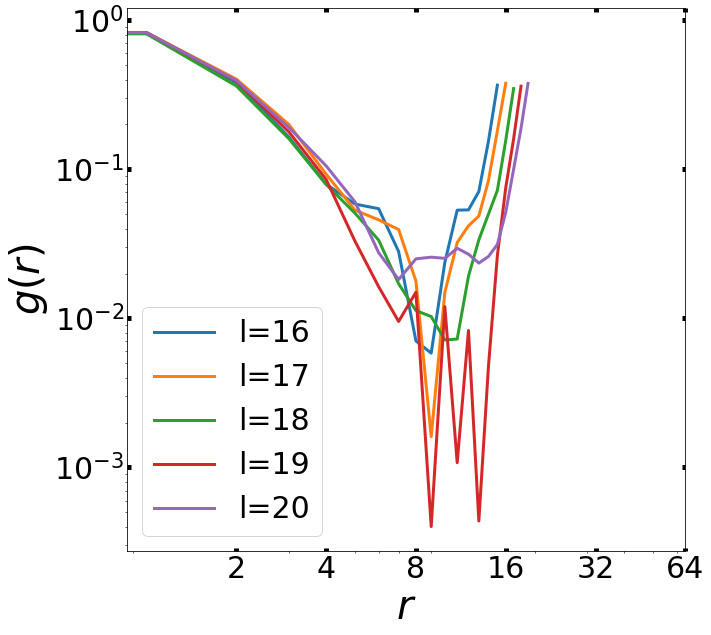

In [45]:
plt.figure(figsize=(10,10))
for l in ls:
    plt.plot(np.roll(g[l],shift=1),label=f'l={l}',linewidth=3,)
plt.loglog()
plt.legend(fontsize=30)
plt.xlabel(r'$r$',fontsize=40)
plt.ylabel(r'$g(r)$',fontsize=40)
plt.xticks([2,4,8,16,32,64],[2,4,8,16,32,64])
plt.tick_params(
        top=True,
        right=True,
        labeltop=False,
        labelright=False,
        direction="in",
        labelsize=30,
        width=5,
    )
plt.show()